In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV,cross_val_score,KFold


In [ ]:
data = pd.read_csv("Advertising.csv")

In [ ]:
data.head()

In [5]:
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


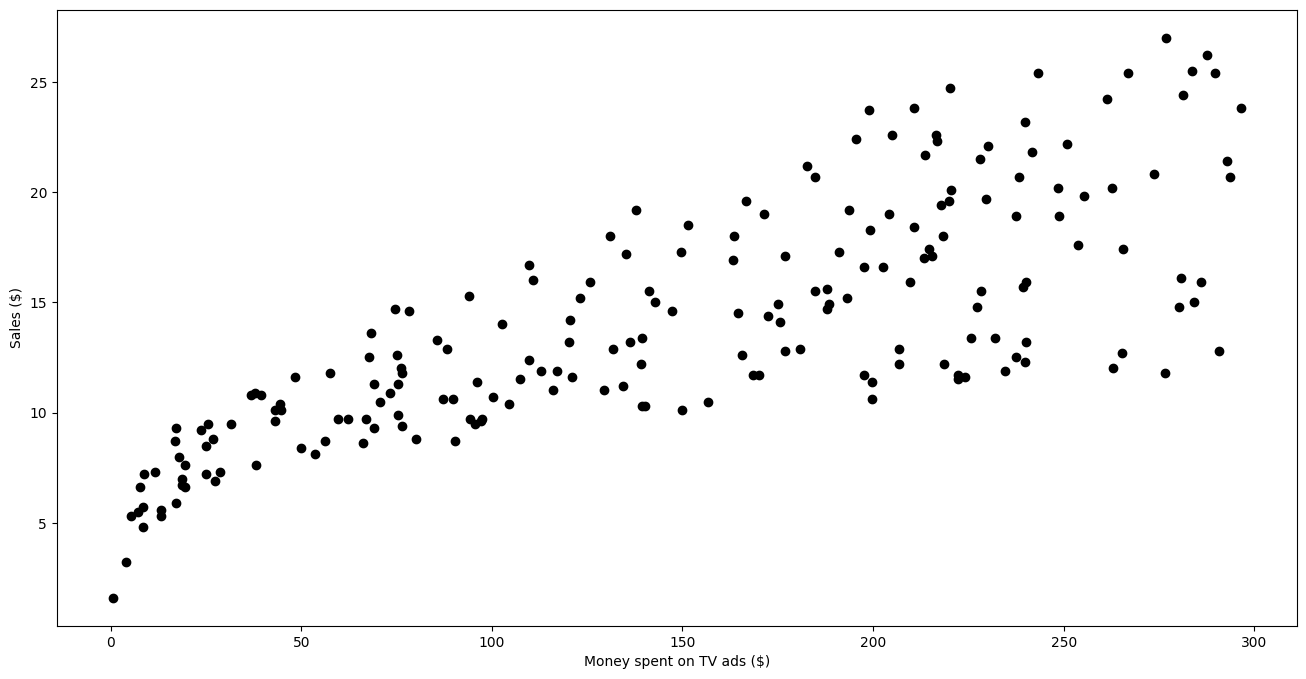

In [6]:
plt.figure(figsize=(16,8))
plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)
plt.xlabel('Money spent on TV ads ($)')
plt.ylabel('Sales ($)')
plt.show()

In [7]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

lr = LinearRegression()
lr.fit(X, y)

print("The linear model is: Y = {:.5} + {:.5}X".format(lr.intercept_[0], lr.coef_[0][0]))

The linear model is: Y = 7.0326 + 0.047537X


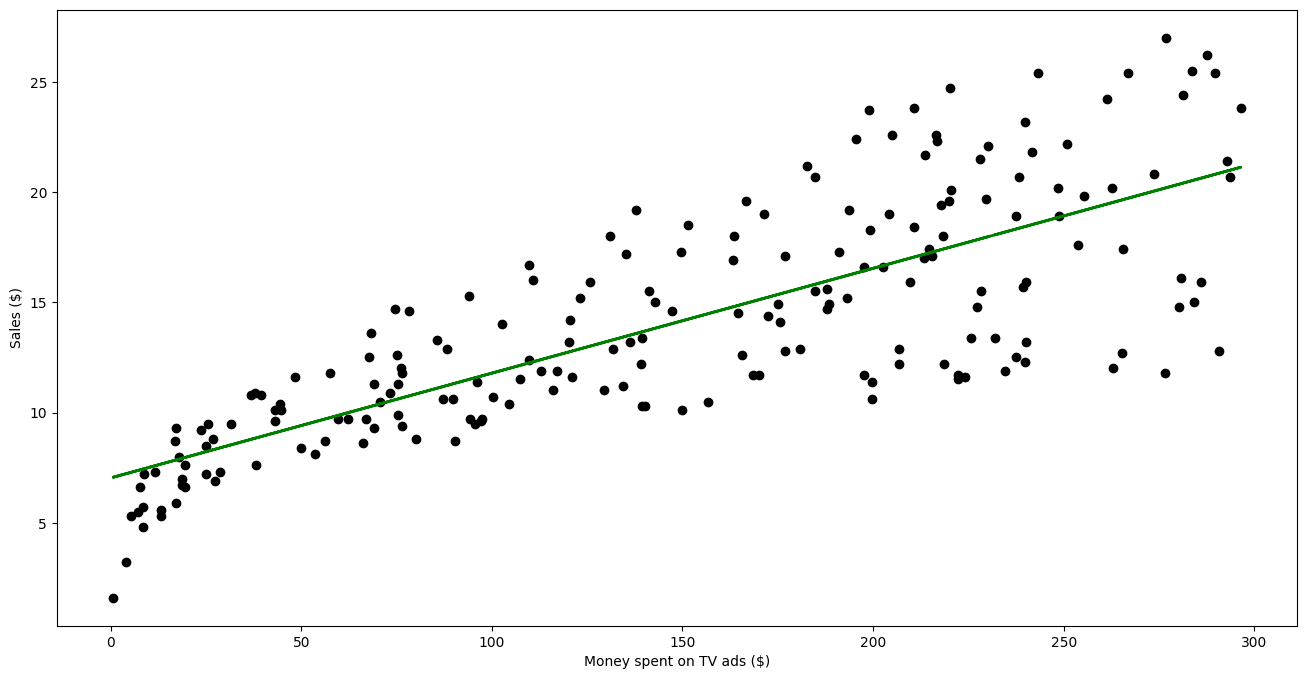

In [8]:
predictions = lr.predict(X)

plt.figure(figsize=(16, 8))

plt.scatter(
    data['TV'],
    data['sales'],
    c='black'
)

plt.plot(
    data['TV'],
    predictions,
    c='green',
    linewidth=2
)

plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()


In [9]:
def predict_sales_value(tv_ads_value):
    return 7.0326 + (0.047537 * tv_ads_value)

In [10]:
predict_sales_value(230.1)

17.970863700000002

In [11]:
predict_sales_value(150)

14.163150000000002

In [13]:
print('Rows ---->',data.shape[0])
print('column --->',data.shape[1])

Rows ----> 200
column ---> 5


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [15]:
data.dtypes

Unnamed: 0      int64
TV            float64
radio         float64
newspaper     float64
sales         float64
dtype: object

In [17]:
data.size

1000

In [18]:
data.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
data.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [22]:
data.duplicated().sum()

0

In [23]:
data[:2]

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4


In [24]:
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


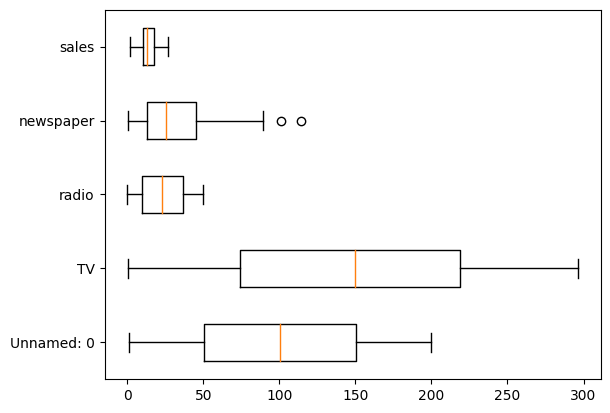

In [26]:
plt.boxplot(data,vert=False,data = data,labels=data.columns)
plt.show()

In [27]:
data[:5]

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


's'

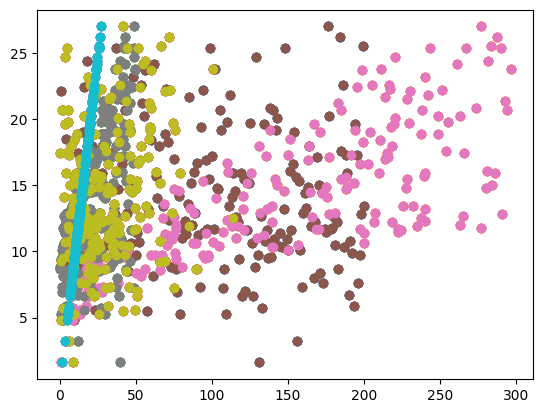

In [36]:
def sc():
    l=data.columns
    for i in range(len(l)-1):
        for j in l:
            s = plt.scatter(j,'sales',data=data)
    return 's'
sc()

<ipython-input-44-040f250fbe3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['newspaper'])


<Axes: xlabel='newspaper', ylabel='Density'>

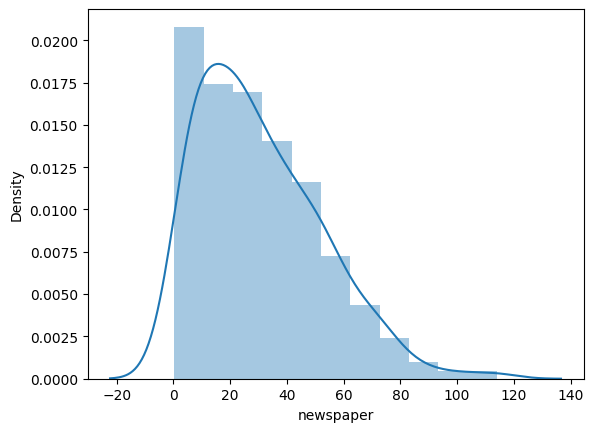

In [44]:
sns.distplot(data['newspaper'])

<ipython-input-47-c011622fc08a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['radio'])


<Axes: xlabel='radio', ylabel='Density'>

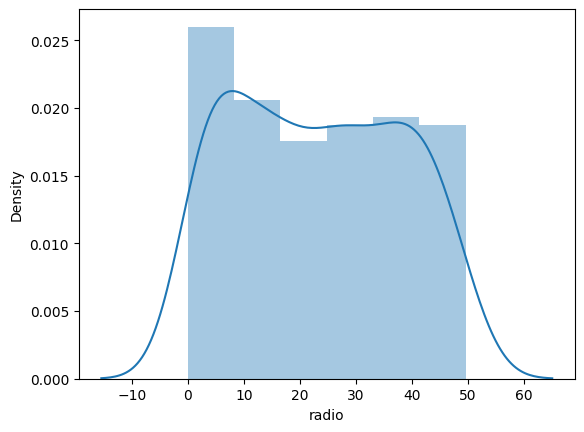

In [47]:
sns.distplot(data['radio'])

In [48]:
data.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [49]:
x=data.iloc[:,:-1]
x

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [50]:
y = data.iloc[:,-1:]

In [51]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size=0.3,random_state=43)

In [52]:
xtrain,ytrain

(        TV  radio  newspaper
 71   109.8   14.3       31.7
 90   134.3    4.9        9.3
 100  222.4    4.3       49.8
 44    25.1   25.7       43.3
 94   107.4   14.0       10.9
 ..     ...    ...        ...
 58   210.8   49.6       37.7
 21   237.4    5.1       23.5
 49    66.9   11.7       36.8
 64   131.1   42.8       28.9
 68   237.4   27.5       11.0
 
 [140 rows x 3 columns],
      sales
 71    12.4
 90    11.2
 100   11.7
 44     8.5
 94    11.5
 ..     ...
 58    23.8
 21    12.5
 49     9.7
 64    18.0
 68    18.9
 
 [140 rows x 1 columns])

In [53]:
xtest,ytest

(        TV  radio  newspaper
 56     7.3   28.1       41.4
 37    74.7   49.4       45.7
 67   139.3   14.5       10.2
 79   116.0    7.7       23.1
 80    76.4   26.7       22.3
 188  286.0   13.9        3.7
 183  287.6   43.0       71.8
 10    66.1    5.8       24.2
 128  220.3   49.0        3.2
 62   239.3   15.5       27.3
 65    69.0    9.3        0.9
 17   281.4   39.6       55.8
 133  219.8   33.5       45.1
 195   38.2    3.7       13.8
 146  240.1    7.3        8.7
 38    43.1   26.7       35.1
 173  168.4    7.1       12.8
 149   44.7   25.8       20.6
 93   250.9   36.5       72.3
 29    70.6   16.0       40.8
 0    230.1   37.8       69.2
 2     17.2   45.9       69.3
 122  224.0    2.4       15.6
 180  156.6    2.6        8.3
 95   163.3   31.6       52.9
 121   18.8   21.7       50.4
 185  205.0   45.1       19.6
 39   228.0   37.7       32.0
 66    31.5   24.6        2.2
 19   147.3   23.9       19.1
 11   214.7   24.0        4.0
 45   175.1   22.5       31.5
 41   177.

In [57]:
lasso = Lasso()
lasso.fit(xtrain,ytrain)
lasso.predict(xtest)
lasso.score(xtrain,ytrain)
lasso.score(xtest,ytest)

0.9204771495691686

In [65]:
lasso_grid_para={
    'alpha':[1.0,0.01,0.2,0.3,0.01,0.02],
    'fit_intercept':[True],
   # 'normalize':['deprecated'],
    'copy_X':[True],
    'max_iter':[1000,2000,5000,7000,10000,13000,15000],
    'positive':[False],
    'random_state':[0],
    'selection':['cyclic']
}

In [66]:
grid_model_lasso=GridSearchCV(lasso,
    param_grid=lasso_grid_para,
    n_jobs=-1,
    cv=5)
grid_model_lasso

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [67]:
grid_model_lasso.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__alpha': 1.0,
 'estimator__copy_X': True,
 'estimator__fit_intercept': True,
 'estimator__max_iter': 1000,
 'estimator__positive': False,
 'estimator__precompute': False,
 'estimator__random_state': None,
 'estimator__selection': 'cyclic',
 'estimator__tol': 0.0001,
 'estimator__warm_start': False,
 'estimator': Lasso(),
 'n_jobs': -1,
 'param_grid': {'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
  'fit_intercept': [True],
  'copy_X': [True],
  'max_iter': [1000, 2000, 5000, 7000, 10000, 13000, 15000],
  'positive': [False],
  'random_state': [0],
  'selection': ['cyclic']},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 0}

In [68]:
grid_model_lasso.set_params()

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [1.0, 0.01, 0.2, 0.3, 0.01, 0.02],
                         'copy_X': [True], 'fit_intercept': [True],
                         'max_iter': [1000, 2000, 5000, 7000, 10000, 13000,
                                      15000],
                         'positive': [False], 'random_state': [0],
                         'selection': ['cyclic']})

In [69]:
grid_model_lasso.fit(xtrain,ytrain)
grid_model_lasso.predict(xtest)
grid_model_lasso.score(xtrain,ytrain)
grid_model_lasso.score(xtest,ytest)

0.9204771495691686